# Praca domowa nr 5
Jakub Szypuła

In [88]:
import pandas as pd
import numpy as np
dane = pd.read_csv('https://raw.githubusercontent.com/mini-pw/2020L-WUM/master/Prace_domowe/Praca_domowa5/clustering.csv', names=["x", "y"])
dane.head()

,x,y
0,41.788907,52.220182
1,-96.586516,90.957033
2,-54.143591,-99.153377
3,19.929231,-45.859779
4,-82.941076,84.099186


In [13]:
dane.shape

(400, 2)

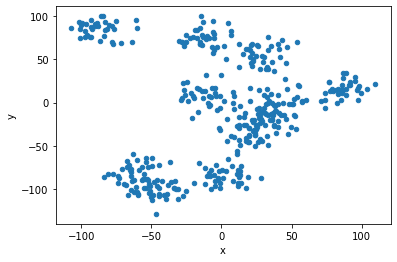

In [7]:
dane.plot.scatter(x='x', y='y')

Patrząc pobieżnie, wygląda to na 6 grup, chociaż mogę się mylić. Trzeba się przekonać.

# Metoda k-średnich

In [114]:
from sklearn.cluster import KMeans
def count_wcss_scores(dane, k_max):
    scores = []
    for k in range(1, k_max+1):
        kmeans = KMeans(n_clusters=k, random_state=121)
        kmeans.fit(dane)
        wcss = kmeans.score(dane) * -1
        scores.append(wcss)
    return scores

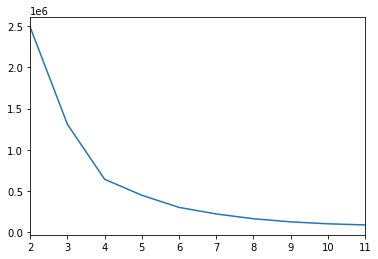

In [133]:
wyniki = pd.Series(count_wcss_scores(dane, 10))
wyniki.index += 2
wyniki.plot.line(xticks = list(range(2, 12)))

Faktycznie przy 8 zaczyna się wypłaszczać, dlatego wybiorę je jako optymalne k. Jednak 6 nie było dobrym wyborem. Zobaczymy jak to wygląda na wykresie.

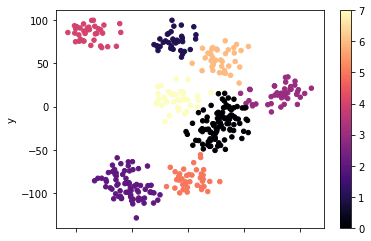

In [150]:
import copy
import warnings
warnings.filterwarnings('ignore')
kmeans = KMeans(n_clusters=8, random_state=121)
kmeans.fit(dane)
y_kmeans = kmeans.predict(dane)
dane2.plot.scatter(x='x', y='y', c = y_kmeans, cmap = cmap)


Nie wygląda źle.

## Metoda aglomeracyjna

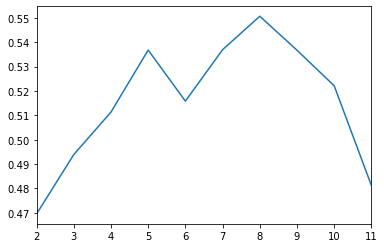

In [138]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
wyniki2 = []
kolejne_k = range(2, 12)
for k in kolejne_k:
    model = AgglomerativeClustering(n_clusters = k)
    etykiety = model.fit_predict(dane)
    wyniki2.append(silhouette_score(dane, etykiety))
    
wyniki2 = pd.Series(wyniki2)
wyniki2.index += 2
wyniki2.plot.line(xticks = list(range(2, 12)))

In [139]:
wyniki2

2     0.469546
3     0.493910
4     0.511349
5     0.536817
6     0.515856
7     0.536952
8     0.550694
9     0.536760
10    0.522149
11    0.481245
dtype: float64

Po raz kolejny okazało się, że najlepsze jest 8.

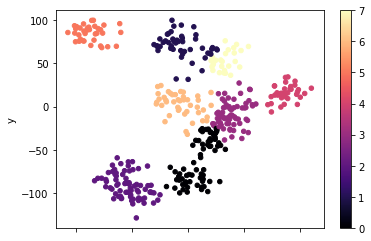

In [142]:
model = AgglomerativeClustering(n_clusters = 8, linkage = "complete")
etykiety2 = model.fit_predict(dane)
plt2 = dane2.plot.scatter(x='x', y='y', c = etykiety2, cmap = cmap)

Dla przypomnienia, poprzedni clustering:

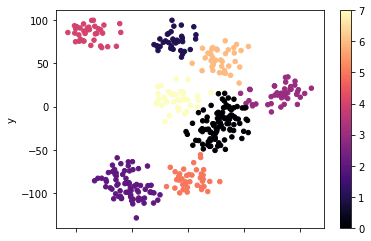

In [151]:
dane2.plot.scatter(x='x', y='y', c = y_kmeans, cmap = cmap)

## Oświadczenie
Oświadczam, że niniejsza praca stanowiąca podstawę do uznania osiągnięcia efektów uczenia się z przedmiotu Wstęp do Uczenia Maszynowego została wykonana przeze mnie samodzielnie.

Jakub Szypuła
298845